# Informal benchmarking

Done on my laptop (a Dell XPS 13 9360 with ~8 GB of RAM).

One major caveat of this: all of the sequences I "simulate" as test data are generated randomly. Creating dot plots of similar sequences should give more realistic results.

In [2]:
import time
import random
import wotplot
from matplotlib import pyplot

In [3]:
def genseq(n):
    # generates a random DNA sequence of length n
    s = ""
    for i in range(n):
        s += random.choice("ACGT")
    return s

In [4]:
def run(s1, s2, k, binary, markersize, ax, force_binary=False):
    print(f"binary = {binary}...", flush=True)
    t0 = time.time()
    m = wotplot.DotPlotMatrix(s1, s2, k, binary=binary, verbose=True)
    t1 = time.time()
    print(f"Matrix construction took {t1 - t0:,.2f} sec.", flush=True)
    wotplot.viz_spy(m, markersize=markersize, force_binary=force_binary, title=f"$k$ = {k:,}", verbose=True, ax=ax)
    t2 = time.time()
    print(f"Visualization took {t2 - t1:,.2f} sec.", flush=True)
    return m, (t2 - t0)

def sim(n, k, markersize=0.5, fig_size_inches=(10, 7), incl_fb=False):
    # Generate a grid of dot plot visualizations for two randomly-generated sequences of length n,
    # given a k-mer size k. If incl_fb = False, then the left plot will show a visualization of the
    # binary matrix and the right plot will show a visualization of the not-binary matrix.
    #
    # Set incl_fb = True to add a third dot plot (on the right side) showing a visualization of the
    # not-binary matrix created using force_binary=True. This is just another layer of paranoid
    # benchmarking to make sure that parameter works as expected.
    s1 = genseq(n)
    s2 = genseq(n)
    if incl_fb:
        fig, (axB, axN, axN2) = pyplot.subplots(1, 3)
    else:
        fig, (axB, axN) = pyplot.subplots(1, 2)
        
    mB, tB = run(s1, s2, k, True, markersize, axB)
    axB.set_title(f"{tB:,.2f} sec.", fontsize=18)
    mN, tN = run(s1, s2, k, False, markersize, axN)
    axN.set_title(f"{tN:,.2f} sec.", fontsize=18)
    
    if incl_fb:
        mN2, tN2 = run(s1, s2, k, False, markersize, axN2, force_binary=True)
        axN2.set_title(f"{tN2:,.2f} sec.", fontsize=18)
        tt = tB + tN + tN2
    else:
        tt = tB + tN
        
    print(f"Total time taken: {tt:,.2f} sec.", flush=True)
    sty = 0.86 if not incl_fb else 0.77
    fig.suptitle(f"$n$ = {n:,}; $k$ = {k:,}", fontsize=22, x=0.51, y=sty)
    fig.set_size_inches(fig_size_inches)
    
    if incl_fb:
        return (mB, mN, mN2)
    else:
        return (mB, mN)

# 100 x 100

binary = True...
0.01s: validating inputs...
0.01s: finding forward matches between s1 and s2...
0.02s: found 2,388 forward match cell(s).
0.02s: computing ReverseComplement(s2)...
0.03s: finding reverse-complementary matches between s1 and s2...
0.04s: found 4,904 total match cell(s).
0.04s: density = 49.04%.
0.04s: converting match information to COO format inputs...
0.05s: creating sparse matrix from COO format inputs...
0.05s: done creating the matrix.
Matrix construction took 0.06 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.02 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.01s: found 2,388 forward match cell(s).
0.01s: computing ReverseComplement(s2)...
0.01s: finding reverse-complementary matches between s1 and s2...
0.03s: found 4,904 total match cell(s).
0.03s: density = 49.04%.
0.03s: conve

(DotPlotMatrix(mat=<100x100 sparse matrix of type '<class 'numpy.int64'>'
 	with 4904 stored elements in COOrdinate format>, k=1, yorder="BT", binary=True),
 DotPlotMatrix(mat=<100x100 sparse matrix of type '<class 'numpy.int64'>'
 	with 4904 stored elements in COOrdinate format>, k=1, yorder="BT", binary=False),
 DotPlotMatrix(mat=<100x100 sparse matrix of type '<class 'numpy.int64'>'
 	with 4904 stored elements in COOrdinate format>, k=1, yorder="BT", binary=False))

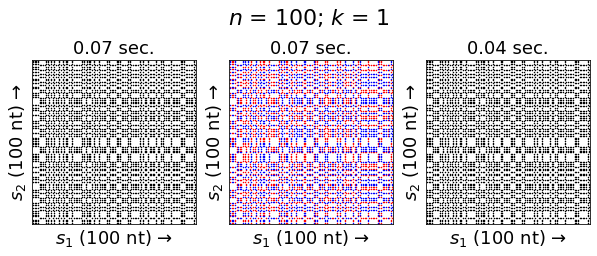

In [4]:
sim(100, 1, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.01s: found 609 forward match cell(s).
0.01s: computing ReverseComplement(s2)...
0.01s: finding reverse-complementary matches between s1 and s2...
0.02s: found 1,055 total match cell(s).
0.02s: density = 10.76%.
0.02s: converting match information to COO format inputs...
0.02s: creating sparse matrix from COO format inputs...
0.02s: done creating the matrix.
Matrix construction took 0.02 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.00s: found 609 forward match cell(s).
0.00s: computing ReverseComplement(s2)...
0.01s: finding reverse-complementary matches between s1 and s2...
0.01s: found 1,055 total match cell(s).
0.01s: density = 10.76%.
0.01s: convertin

(DotPlotMatrix(mat=<99x99 sparse matrix of type '<class 'numpy.int64'>'
 	with 1055 stored elements in COOrdinate format>, k=2, yorder="BT", binary=True),
 DotPlotMatrix(mat=<99x99 sparse matrix of type '<class 'numpy.int64'>'
 	with 1055 stored elements in COOrdinate format>, k=2, yorder="BT", binary=False),
 DotPlotMatrix(mat=<99x99 sparse matrix of type '<class 'numpy.int64'>'
 	with 1055 stored elements in COOrdinate format>, k=2, yorder="BT", binary=False))

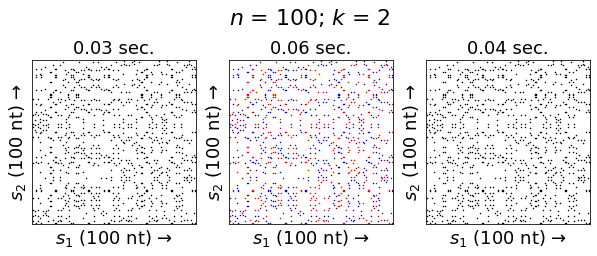

In [5]:
sim(100, 2, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.00s: found 142 forward match cell(s).
0.01s: computing ReverseComplement(s2)...
0.01s: finding reverse-complementary matches between s1 and s2...
0.01s: found 284 total match cell(s).
0.01s: density = 2.96%.
0.01s: converting match information to COO format inputs...
0.01s: creating sparse matrix from COO format inputs...
0.01s: done creating the matrix.
Matrix construction took 0.01 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.00s: found 142 forward match cell(s).
0.00s: computing ReverseComplement(s2)...
0.00s: finding reverse-complementary matches between s1 and s2...
0.01s: found 284 total match cell(s).
0.01s: density = 2.96%.
0.01s: converting matc

(DotPlotMatrix(mat=<98x98 sparse matrix of type '<class 'numpy.int64'>'
 	with 284 stored elements in COOrdinate format>, k=3, yorder="BT", binary=True),
 DotPlotMatrix(mat=<98x98 sparse matrix of type '<class 'numpy.int64'>'
 	with 284 stored elements in COOrdinate format>, k=3, yorder="BT", binary=False),
 DotPlotMatrix(mat=<98x98 sparse matrix of type '<class 'numpy.int64'>'
 	with 284 stored elements in COOrdinate format>, k=3, yorder="BT", binary=False))

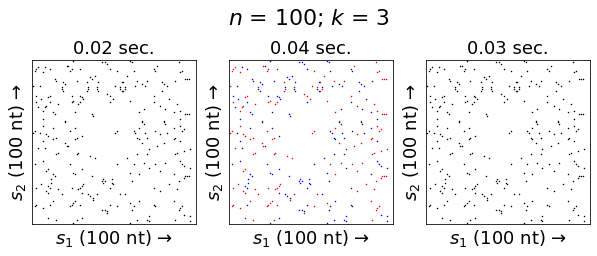

In [6]:
sim(100, 3, incl_fb=True)

# 500 x 500

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.15s: found 62,532 forward match cell(s).
0.15s: computing ReverseComplement(s2)...
0.15s: finding reverse-complementary matches between s1 and s2...
0.31s: found 125,088 total match cell(s).
0.31s: density = 50.04%.
0.31s: converting match information to COO format inputs...
0.37s: creating sparse matrix from COO format inputs...
0.41s: done creating the matrix.
Matrix construction took 0.41 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.18s: found 62,532 forward match cell(s).
0.18s: computing ReverseComplement(s2)...
0.18s: finding reverse-complementary matches between s1 and s2...
0.34s: found 125,088 total match cell(s).
0.34s: density = 50.04%.
0.34s:

(DotPlotMatrix(mat=<500x500 sparse matrix of type '<class 'numpy.int64'>'
 	with 125088 stored elements in COOrdinate format>, k=1, yorder="BT", binary=True),
 DotPlotMatrix(mat=<500x500 sparse matrix of type '<class 'numpy.int64'>'
 	with 125088 stored elements in COOrdinate format>, k=1, yorder="BT", binary=False),
 DotPlotMatrix(mat=<500x500 sparse matrix of type '<class 'numpy.int64'>'
 	with 125088 stored elements in COOrdinate format>, k=1, yorder="BT", binary=False))

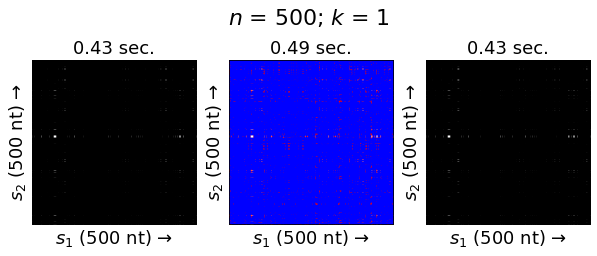

In [7]:
sim(500, 1, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.05s: found 15,706 forward match cell(s).
0.05s: computing ReverseComplement(s2)...
0.05s: finding reverse-complementary matches between s1 and s2...
0.09s: found 27,972 total match cell(s).
0.09s: density = 11.23%.
0.09s: converting match information to COO format inputs...
0.10s: creating sparse matrix from COO format inputs...
0.12s: done creating the matrix.
Matrix construction took 0.12 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.04s: found 15,706 forward match cell(s).
0.04s: computing ReverseComplement(s2)...
0.04s: finding reverse-complementary matches between s1 and s2...
0.08s: found 27,972 total match cell(s).
0.08s: density = 11.23%.
0.08s: c

(DotPlotMatrix(mat=<499x499 sparse matrix of type '<class 'numpy.int64'>'
 	with 27972 stored elements in COOrdinate format>, k=2, yorder="BT", binary=True),
 DotPlotMatrix(mat=<499x499 sparse matrix of type '<class 'numpy.int64'>'
 	with 27972 stored elements in COOrdinate format>, k=2, yorder="BT", binary=False),
 DotPlotMatrix(mat=<499x499 sparse matrix of type '<class 'numpy.int64'>'
 	with 27972 stored elements in COOrdinate format>, k=2, yorder="BT", binary=False))

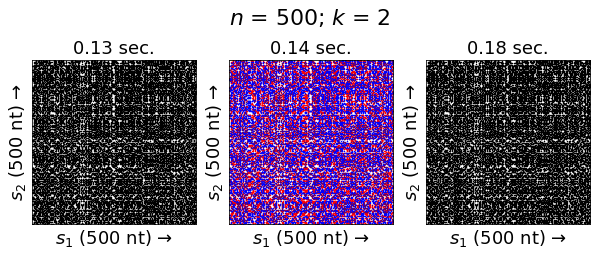

In [8]:
sim(500, 2, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.01s: found 262 forward match cell(s).
0.01s: computing ReverseComplement(s2)...
0.01s: finding reverse-complementary matches between s1 and s2...
0.01s: found 503 total match cell(s).
0.01s: density = 0.20%.
0.01s: converting match information to COO format inputs...
0.01s: creating sparse matrix from COO format inputs...
0.02s: done creating the matrix.
Matrix construction took 0.02 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.01s: found 262 forward match cell(s).
0.01s: computing ReverseComplement(s2)...
0.02s: finding reverse-complementary matches between s1 and s2...
0.02s: found 503 total match cell(s).
0.03s: density = 0.20%.
0.03s: converting matc

(DotPlotMatrix(mat=<496x496 sparse matrix of type '<class 'numpy.int64'>'
 	with 503 stored elements in COOrdinate format>, k=5, yorder="BT", binary=True),
 DotPlotMatrix(mat=<496x496 sparse matrix of type '<class 'numpy.int64'>'
 	with 503 stored elements in COOrdinate format>, k=5, yorder="BT", binary=False),
 DotPlotMatrix(mat=<496x496 sparse matrix of type '<class 'numpy.int64'>'
 	with 503 stored elements in COOrdinate format>, k=5, yorder="BT", binary=False))

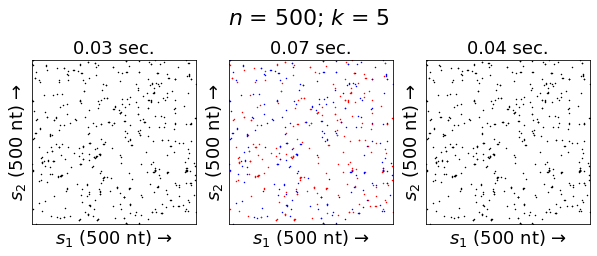

In [9]:
sim(500, 5, incl_fb=True)

# 1,000 x 1,000

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.16s: found 62,354 forward match cell(s).
0.16s: computing ReverseComplement(s2)...
0.16s: finding reverse-complementary matches between s1 and s2...
0.33s: found 111,380 total match cell(s).
0.33s: density = 11.16%.
0.33s: converting match information to COO format inputs...
0.37s: creating sparse matrix from COO format inputs...
0.41s: done creating the matrix.
Matrix construction took 0.41 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.15s: found 62,354 forward match cell(s).
0.16s: computing ReverseComplement(s2)...
0.16s: finding reverse-complementary matches between s1 and s2...
0.34s: found 111,380 total match cell(s).
0.34s: density = 11.16%.
0.35s:

(DotPlotMatrix(mat=<999x999 sparse matrix of type '<class 'numpy.int64'>'
 	with 111380 stored elements in COOrdinate format>, k=2, yorder="BT", binary=True),
 DotPlotMatrix(mat=<999x999 sparse matrix of type '<class 'numpy.int64'>'
 	with 111380 stored elements in COOrdinate format>, k=2, yorder="BT", binary=False),
 DotPlotMatrix(mat=<999x999 sparse matrix of type '<class 'numpy.int64'>'
 	with 111380 stored elements in COOrdinate format>, k=2, yorder="BT", binary=False))

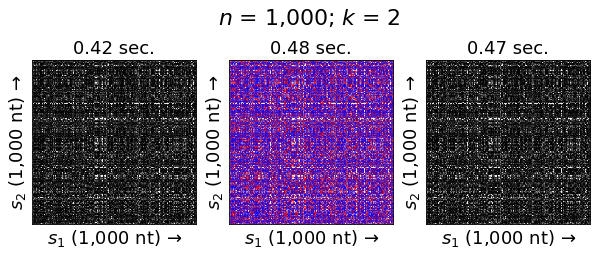

In [10]:
sim(1000, 2, markersize=0.1, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.05s: found 15,590 forward match cell(s).
0.05s: computing ReverseComplement(s2)...
0.05s: finding reverse-complementary matches between s1 and s2...
0.10s: found 31,264 total match cell(s).
0.10s: density = 3.14%.
0.10s: converting match information to COO format inputs...
0.12s: creating sparse matrix from COO format inputs...
0.13s: done creating the matrix.
Matrix construction took 0.13 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.04s: found 15,590 forward match cell(s).
0.04s: computing ReverseComplement(s2)...
0.04s: finding reverse-complementary matches between s1 and s2...
0.09s: found 31,264 total match cell(s).
0.09s: density = 3.14%.
0.09s: con

(DotPlotMatrix(mat=<998x998 sparse matrix of type '<class 'numpy.int64'>'
 	with 31264 stored elements in COOrdinate format>, k=3, yorder="BT", binary=True),
 DotPlotMatrix(mat=<998x998 sparse matrix of type '<class 'numpy.int64'>'
 	with 31264 stored elements in COOrdinate format>, k=3, yorder="BT", binary=False),
 DotPlotMatrix(mat=<998x998 sparse matrix of type '<class 'numpy.int64'>'
 	with 31264 stored elements in COOrdinate format>, k=3, yorder="BT", binary=False))

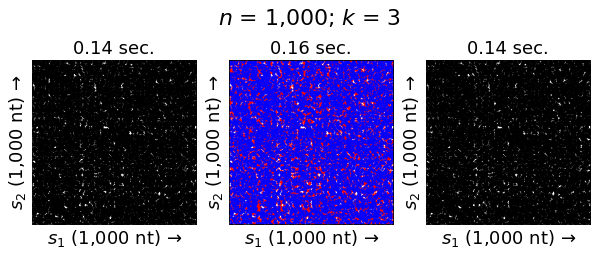

In [11]:
sim(1000, 3, markersize=1, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.01s: found 947 forward match cell(s).
0.01s: computing ReverseComplement(s2)...
0.01s: finding reverse-complementary matches between s1 and s2...
0.01s: found 1,981 total match cell(s).
0.01s: density = 0.20%.
0.01s: converting match information to COO format inputs...
0.02s: creating sparse matrix from COO format inputs...
0.02s: done creating the matrix.
Matrix construction took 0.02 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.01s: found 947 forward match cell(s).
0.01s: computing ReverseComplement(s2)...
0.01s: finding reverse-complementary matches between s1 and s2...
0.01s: found 1,981 total match cell(s).
0.01s: density = 0.20%.
0.01s: converting 

(DotPlotMatrix(mat=<996x996 sparse matrix of type '<class 'numpy.int64'>'
 	with 1981 stored elements in COOrdinate format>, k=5, yorder="BT", binary=True),
 DotPlotMatrix(mat=<996x996 sparse matrix of type '<class 'numpy.int64'>'
 	with 1981 stored elements in COOrdinate format>, k=5, yorder="BT", binary=False),
 DotPlotMatrix(mat=<996x996 sparse matrix of type '<class 'numpy.int64'>'
 	with 1981 stored elements in COOrdinate format>, k=5, yorder="BT", binary=False))

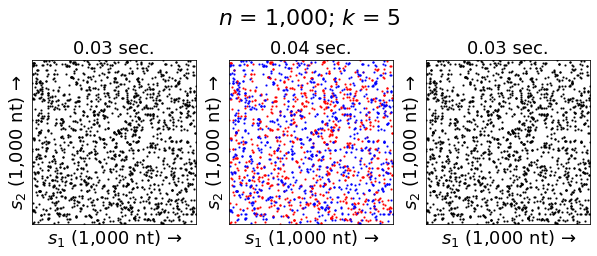

In [12]:
sim(1000, 5, markersize=1, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.00s: found 2 forward match cell(s).
0.00s: computing ReverseComplement(s2)...
0.00s: finding reverse-complementary matches between s1 and s2...
0.01s: found 2 total match cell(s).
0.01s: density = 0.00%.
0.01s: converting match information to COO format inputs...
0.01s: creating sparse matrix from COO format inputs...
0.01s: done creating the matrix.
Matrix construction took 0.01 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.01s: found 2 forward match cell(s).
0.01s: computing ReverseComplement(s2)...
0.01s: finding reverse-complementary matches between s1 and s2...
0.01s: found 2 total match cell(s).
0.02s: density = 0.00%.
0.02s: converting match inform

(DotPlotMatrix(mat=<991x991 sparse matrix of type '<class 'numpy.int64'>'
 	with 2 stored elements in COOrdinate format>, k=10, yorder="BT", binary=True),
 DotPlotMatrix(mat=<991x991 sparse matrix of type '<class 'numpy.int64'>'
 	with 2 stored elements in COOrdinate format>, k=10, yorder="BT", binary=False),
 DotPlotMatrix(mat=<991x991 sparse matrix of type '<class 'numpy.int64'>'
 	with 2 stored elements in COOrdinate format>, k=10, yorder="BT", binary=False))

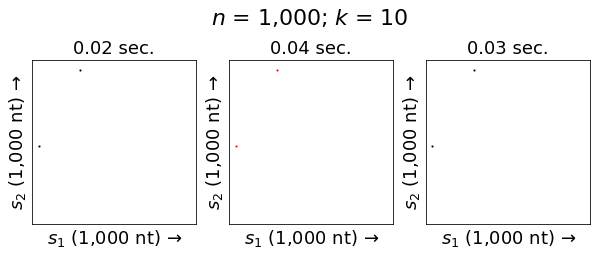

In [13]:
sim(1000, 10, markersize=1, incl_fb=True)

# 10,000 x 10,000

I don't know why you'd want to use $k$ = 2 in practice for two long sequences but here you go, it's possible

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
14.86s: found 6,247,022 forward match cell(s).
15.17s: computing ReverseComplement(s2)...
15.17s: finding reverse-complementary matches between s1 and s2...
31.86s: found 10,913,975 total match cell(s).
32.14s: density = 10.92%.
32.14s: converting match information to COO format inputs...
38.12s: creating sparse matrix from COO format inputs...
41.02s: done creating the matrix.
Matrix construction took 41.71 sec.
0.00s: Visualizing all match cells with spy()...
0.42s: Done visualizing all match cells.
0.42s: Slightly restyling the visualization...
0.42s: Done.
Visualization took 0.42 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
14.69s: found 6,247,022 forward match cell(s).
14.94s: computing ReverseComplement(s2)...
14.94s: finding reverse-complementary matches between s1 and s2...
30.09s: found 10,913,975 total match cell(s).
30.34s

(DotPlotMatrix(mat=<9999x9999 sparse matrix of type '<class 'numpy.int64'>'
 	with 10913975 stored elements in COOrdinate format>, k=2, yorder="BT", binary=True),
 DotPlotMatrix(mat=<9999x9999 sparse matrix of type '<class 'numpy.int64'>'
 	with 10913975 stored elements in COOrdinate format>, k=2, yorder="BT", binary=False),
 DotPlotMatrix(mat=<9999x9999 sparse matrix of type '<class 'numpy.int64'>'
 	with 10913975 stored elements in COOrdinate format>, k=2, yorder="BT", binary=False))

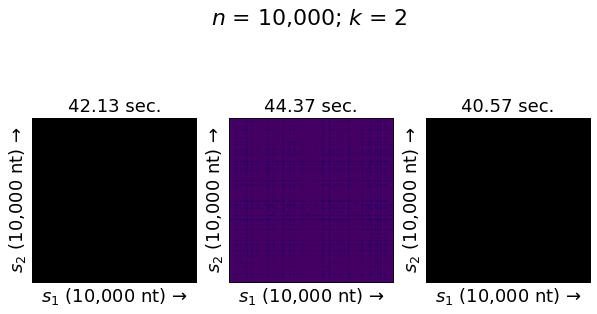

In [14]:
sim(10000, 2, markersize=0.005, fig_size_inches=(10, 10), incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.24s: found 98,064 forward match cell(s).
0.24s: computing ReverseComplement(s2)...
0.24s: finding reverse-complementary matches between s1 and s2...
0.49s: found 195,515 total match cell(s).
0.50s: density = 0.20%.
0.50s: converting match information to COO format inputs...
0.58s: creating sparse matrix from COO format inputs...
0.63s: done creating the matrix.
Matrix construction took 0.64 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.24s: found 98,064 forward match cell(s).
0.24s: computing ReverseComplement(s2)...
0.24s: finding reverse-complementary matches between s1 and s2...
0.49s: found 195,515 total match cell(s).
0.49s: density = 0.20%.
0.49s: c

(DotPlotMatrix(mat=<9996x9996 sparse matrix of type '<class 'numpy.int64'>'
 	with 195515 stored elements in COOrdinate format>, k=5, yorder="BT", binary=True),
 DotPlotMatrix(mat=<9996x9996 sparse matrix of type '<class 'numpy.int64'>'
 	with 195515 stored elements in COOrdinate format>, k=5, yorder="BT", binary=False),
 DotPlotMatrix(mat=<9996x9996 sparse matrix of type '<class 'numpy.int64'>'
 	with 195515 stored elements in COOrdinate format>, k=5, yorder="BT", binary=False))

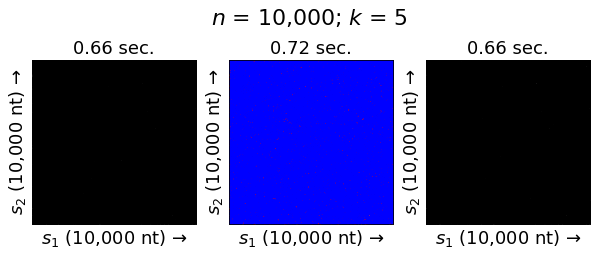

In [15]:
sim(10000, 5, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.01s: found 71 forward match cell(s).
0.01s: computing ReverseComplement(s2)...
0.02s: finding reverse-complementary matches between s1 and s2...
0.03s: found 178 total match cell(s).
0.03s: density = 0.00%.
0.03s: converting match information to COO format inputs...
0.03s: creating sparse matrix from COO format inputs...
0.03s: done creating the matrix.
Matrix construction took 0.03 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.02s: found 71 forward match cell(s).
0.02s: computing ReverseComplement(s2)...
0.02s: finding reverse-complementary matches between s1 and s2...
0.03s: found 178 total match cell(s).
0.03s: density = 0.00%.
0.03s: converting match 

(DotPlotMatrix(mat=<9991x9991 sparse matrix of type '<class 'numpy.int64'>'
 	with 178 stored elements in COOrdinate format>, k=10, yorder="BT", binary=True),
 DotPlotMatrix(mat=<9991x9991 sparse matrix of type '<class 'numpy.int64'>'
 	with 178 stored elements in COOrdinate format>, k=10, yorder="BT", binary=False),
 DotPlotMatrix(mat=<9991x9991 sparse matrix of type '<class 'numpy.int64'>'
 	with 178 stored elements in COOrdinate format>, k=10, yorder="BT", binary=False))

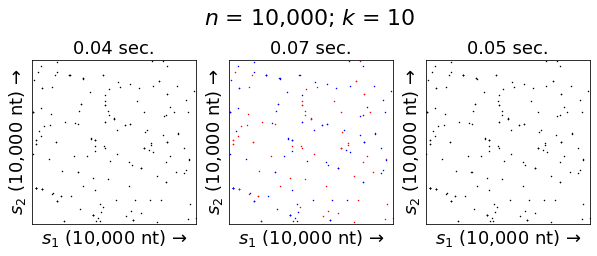

In [16]:
sim(10000, 10, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.02s: found 0 forward match cell(s).
0.02s: computing ReverseComplement(s2)...
0.02s: finding reverse-complementary matches between s1 and s2...
0.03s: found 0 total match cell(s).
0.03s: density = 0.00%.
0.03s: converting match information to COO format inputs...
0.03s: creating sparse matrix from COO format inputs...
0.03s: done creating the matrix.
Matrix construction took 0.04 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: finding forward matches between s1 and s2...
0.01s: found 0 forward match cell(s).
0.02s: computing ReverseComplement(s2)...
0.02s: finding reverse-complementary matches between s1 and s2...
0.03s: found 0 total match cell(s).
0.03s: density = 0.00%.
0.03s: converting match inform

(DotPlotMatrix(mat=<9981x9981 sparse matrix of type '<class 'numpy.float64'>'
 	with 0 stored elements in COOrdinate format>, k=20, yorder="BT", binary=True),
 DotPlotMatrix(mat=<9981x9981 sparse matrix of type '<class 'numpy.float64'>'
 	with 0 stored elements in COOrdinate format>, k=20, yorder="BT", binary=False),
 DotPlotMatrix(mat=<9981x9981 sparse matrix of type '<class 'numpy.float64'>'
 	with 0 stored elements in COOrdinate format>, k=20, yorder="BT", binary=False))

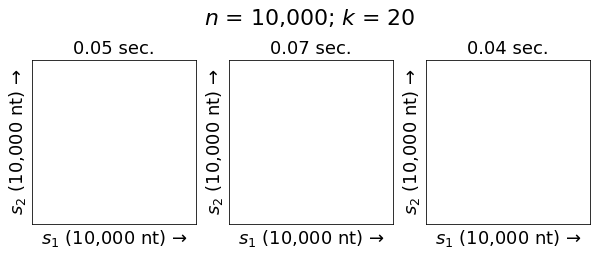

In [17]:
sim(10000, 20, incl_fb=True)

# 100,000 x 100,000

i'm gonna stop including the `force_binary` test (`incl_fb`) here, since i think we've already shown by now that it works to speed up the visualization and the tests from here on are gonna start taking longer and longer

In [ ]:
sim(100000, 5, markersize=0.01)

binary = True...
0.00s: validating inputs...
0.01s: finding forward matches between s1 and s2...
24.59s: found 9,763,268 forward match cell(s).
25.05s: computing ReverseComplement(s2)...
25.05s: finding reverse-complementary matches between s1 and s2...


^^^ Note that this test sometimes crashes Jupyter (I got it to run once by closing most of the other tabs / processes I had running on my computer, then rerunning it). I think it's because $k = 5$ is an extremely small value of $k$ to use when we have sequences this big.

Since there are only $4^5 = 1,024$ possible $5$-mers, the number of random matches in a very large dot plot matrix will increase, causing the matrix to become relatively dense -- and thus require a lot of memory to store. If we need to store $100{,}000^2$ `int`s in memory, and one `int` takes up 1 byte (this is an underestimate -- apparently `int`s in python [generally take up 4 bytes](http://projectpython.net/chapter02/#integer-types)), then we need $10{,}000{,}000{,}000$ bytes of memory (aka 10 GB). This is just out of range for my laptop with 8 GB of RAM!

The other side of the coin is that -- since there are so few possible 5-mers, relatively speaking -- $k = 5$ dot plots are probably not going to be very useful for long sequences, anyway (as we saw above with the $k = 5$ dot plots of two 100,000 nt sequences). Let's try $k = 10$, instead?

binary = True...
0.02s: validating inputs...
0.03s: finding forward matches between s1 and s2...
0.21s: found 9,379 forward match cell(s).
0.21s: computing ReverseComplement(s2)...
0.21s: finding reverse-complementary matches between s1 and s2...
0.35s: found 18,888 total match cell(s).
0.35s: density = 0.00%.
0.35s: converting match information to COO format inputs...
0.36s: creating sparse matrix from COO format inputs...
0.37s: done creating the matrix.
Matrix construction took 0.37 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.02s: finding forward matches between s1 and s2...
0.15s: found 9,379 forward match cell(s).
0.15s: computing ReverseComplement(s2)...
0.15s: finding reverse-complementary matches between s1 and s2...
0.29s: found 18,888 total match cell(s).
0.29s: density = 0.00%.
0.29s: conve

(DotPlotMatrix(mat=<99991x99991 sparse matrix of type '<class 'numpy.int64'>'
 	with 18888 stored elements in COOrdinate format>, k=10, yorder="BT", binary=True),
 DotPlotMatrix(mat=<99991x99991 sparse matrix of type '<class 'numpy.int64'>'
 	with 18888 stored elements in COOrdinate format>, k=10, yorder="BT", binary=False))

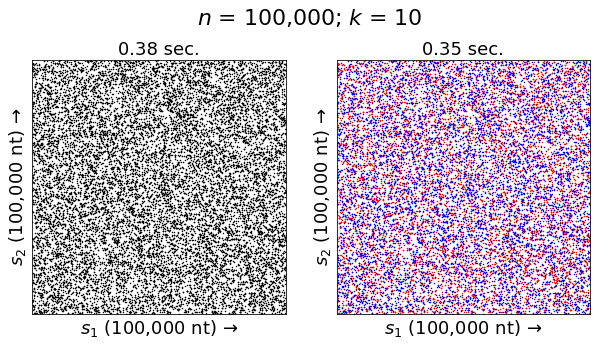

In [5]:
sim(100000, 10)

Yep, this poor computer can handle that much easier.

binary = True...
0.00s: validating inputs...
0.01s: finding forward matches between s1 and s2...
0.12s: found 0 forward match cell(s).
0.12s: computing ReverseComplement(s2)...
0.12s: finding reverse-complementary matches between s1 and s2...
0.23s: found 0 total match cell(s).
0.23s: density = 0.00%.
0.24s: converting match information to COO format inputs...
0.24s: creating sparse matrix from COO format inputs...
0.24s: done creating the matrix.
Matrix construction took 0.24 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.01s: finding forward matches between s1 and s2...
0.13s: found 0 forward match cell(s).
0.13s: computing ReverseComplement(s2)...
0.13s: finding reverse-complementary matches between s1 and s2...
0.24s: found 0 total match cell(s).
0.24s: density = 0.00%.
0.24s: converting match inform

(DotPlotMatrix(mat=<99981x99981 sparse matrix of type '<class 'numpy.float64'>'
 	with 0 stored elements in COOrdinate format>, k=20, yorder="BT", binary=True),
 DotPlotMatrix(mat=<99981x99981 sparse matrix of type '<class 'numpy.float64'>'
 	with 0 stored elements in COOrdinate format>, k=20, yorder="BT", binary=False))

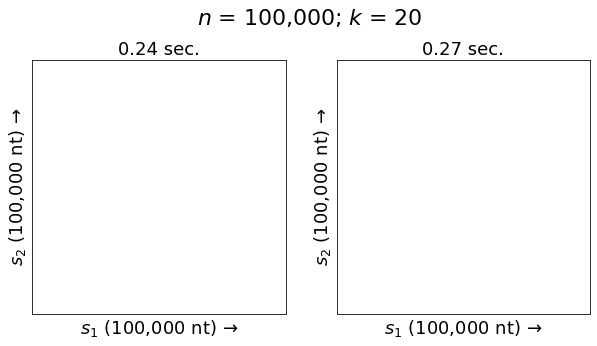

In [6]:
sim(100000, 20)

# 1,000,000 x 1,000,000

In [ ]:
sim(1000000, 5, markersize=0.001, fig_size_inches=(10, 10))

binary = True...
0.00s: validating inputs...
0.08s: computing suffix array for s1...
0.13s: computing suffix array for s2...
0.18s: finding forward matches between s1 and s2...


Again, this crashed Jupyter -- reinforcing the point that you probably shouldn't use $k$ = 5 for 1 Mbp sequences.

binary = True...
0.00s: validating inputs...
0.09s: finding forward matches between s1 and s2...
4.06s: found 954,280 forward match cell(s).
4.09s: computing ReverseComplement(s2)...
4.09s: finding reverse-complementary matches between s1 and s2...
8.15s: found 1,906,478 total match cell(s).
8.19s: density = 0.00%.
8.19s: converting match information to COO format inputs...
9.09s: creating sparse matrix from COO format inputs...
9.70s: done creating the matrix.
Matrix construction took 9.82 sec.
0.00s: Visualizing all match cells with spy()...
0.07s: Done visualizing all match cells.
0.07s: Slightly restyling the visualization...
0.07s: Done.
Visualization took 0.07 sec.
binary = False...
0.00s: validating inputs...
0.10s: finding forward matches between s1 and s2...
3.86s: found 954,280 forward match cell(s).
3.90s: computing ReverseComplement(s2)...
3.90s: finding reverse-complementary matches between s1 and s2...
8.00s: found 1,906,478 total match cell(s).
8.04s: density = 0.00%.
8.

(DotPlotMatrix(mat=<999991x999991 sparse matrix of type '<class 'numpy.int64'>'
 	with 1906478 stored elements in COOrdinate format>, k=10, yorder="BT", binary=True),
 DotPlotMatrix(mat=<999991x999991 sparse matrix of type '<class 'numpy.int64'>'
 	with 1906478 stored elements in COOrdinate format>, k=10, yorder="BT", binary=False))

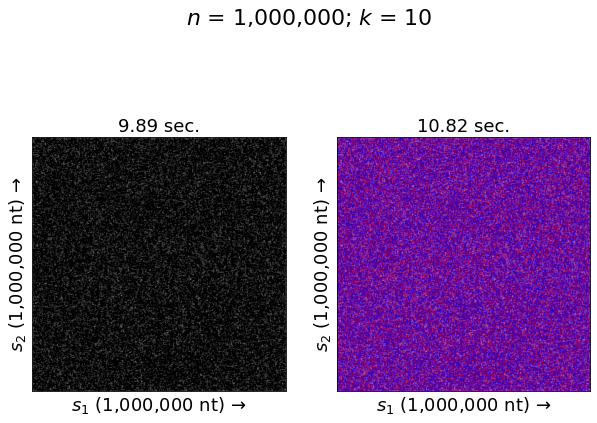

In [7]:
sim(1000000, 10, markersize=0.005, fig_size_inches=(10, 10))

Yep, this is much easier for wotplot to handle. And using a larger _k_ means that the plots will probably be more informative, anyway :)

binary = True...
0.00s: validating inputs...
0.09s: finding forward matches between s1 and s2...
1.04s: found 0 forward match cell(s).
1.04s: computing ReverseComplement(s2)...
1.04s: finding reverse-complementary matches between s1 and s2...
2.05s: found 0 total match cell(s).
2.05s: density = 0.00%.
2.05s: converting match information to COO format inputs...
2.05s: creating sparse matrix from COO format inputs...
2.05s: done creating the matrix.
Matrix construction took 2.05 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.11s: finding forward matches between s1 and s2...
1.09s: found 0 forward match cell(s).
1.09s: computing ReverseComplement(s2)...
1.10s: finding reverse-complementary matches between s1 and s2...
2.08s: found 0 total match cell(s).
2.08s: density = 0.00%.
2.08s: converting match inform

(DotPlotMatrix(mat=<999981x999981 sparse matrix of type '<class 'numpy.float64'>'
 	with 0 stored elements in COOrdinate format>, k=20, yorder="BT", binary=True),
 DotPlotMatrix(mat=<999981x999981 sparse matrix of type '<class 'numpy.float64'>'
 	with 0 stored elements in COOrdinate format>, k=20, yorder="BT", binary=False))

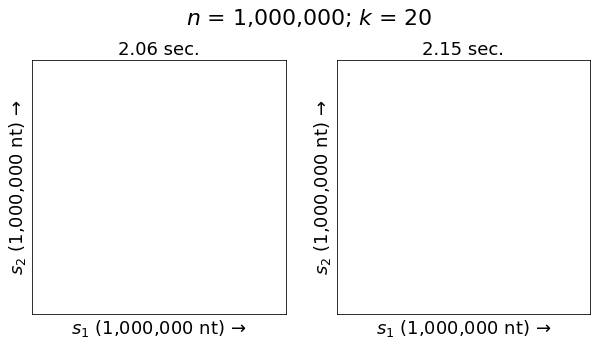

In [8]:
sim(1000000, 20, markersize=1)

# 10,000,000 x 10,000,000

In [ ]:
sim(10000000, 10, markersize=0.005, fig_size_inches=(10, 10))

0.02s: validating inputs...
0.70s: computing suffix array for s1...
1.55s: computing suffix array for s2...
2.40s: computing ReverseComplement(s2)...
3.66s: computing suffix array for ReverseComplement(s2)...
4.51s: finding forward matches between s1 and s2...


This also crashed Jupyter.

binary = True...
0.00s: validating inputs...
0.87s: computing suffix array for s1...
1.53s: computing suffix array for s2...
2.23s: finding forward matches between s1 and s2...
146.85s: found 82 forward match cell(s).
146.85s: computing ReverseComplement(s2)...
146.89s: computing suffix array for ReverseComplement(s2)...
147.82s: finding matches between s1 and ReverseComplement(s2)...
301.83s: found 149 total match cell(s).
301.83s: density = 0.00%.
301.83s: converting match information to COO format inputs...
301.83s: creating sparse matrix from COO format inputs...
301.83s: done creating the matrix.
Matrix construction took 301.83 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.00s: Slightly restyling the visualization...
0.00s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.92s: computing suffix array for s1...
1.63s: computing suffix array for s2...
2.42s: finding forward matches between s1 and s2.

(DotPlotMatrix(mat=<9999981x9999981 sparse matrix of type '<class 'numpy.int64'>'
 	with 149 stored elements in COOrdinate format>, k=20, yorder="BT", binary=True),
 DotPlotMatrix(mat=<9999981x9999981 sparse matrix of type '<class 'numpy.int64'>'
 	with 149 stored elements in COOrdinate format>, k=20, yorder="BT", binary=False))

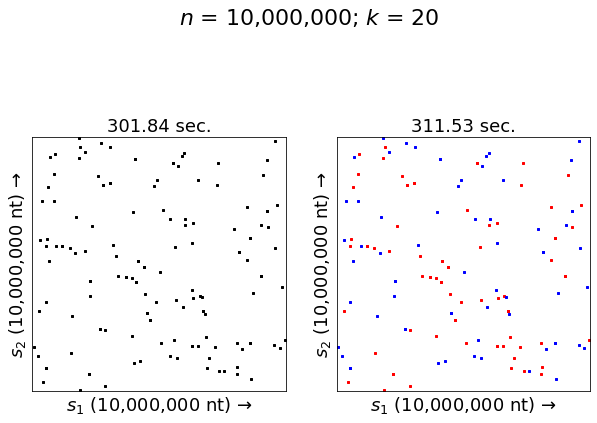

In [7]:
sim(10000000, 20, markersize=2, fig_size_inches=(10, 10))

binary = True...
0.00s: validating inputs...
0.88s: computing suffix array for s1...
1.58s: computing suffix array for s2...
2.39s: finding forward matches between s1 and s2...
141.65s: found 0 forward match cell(s).
141.65s: computing ReverseComplement(s2)...
141.68s: computing suffix array for ReverseComplement(s2)...
142.51s: finding matches between s1 and ReverseComplement(s2)...
284.12s: found 0 total match cell(s).
284.12s: density = 0.00%.
284.13s: converting match information to COO format inputs...
284.13s: creating sparse matrix from COO format inputs...
284.13s: done creating the matrix.
Matrix construction took 284.13 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.00s: Slightly restyling the visualization...
0.00s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.89s: computing suffix array for s1...
1.57s: computing suffix array for s2...
2.27s: finding forward matches between s1 and s2...


(DotPlotMatrix(mat=<9999901x9999901 sparse matrix of type '<class 'numpy.float64'>'
 	with 0 stored elements in COOrdinate format>, k=100, yorder="BT", binary=True),
 DotPlotMatrix(mat=<9999901x9999901 sparse matrix of type '<class 'numpy.float64'>'
 	with 0 stored elements in COOrdinate format>, k=100, yorder="BT", binary=False))

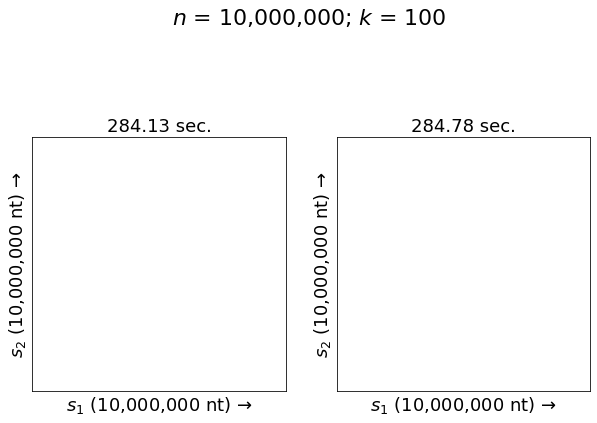

In [8]:
sim(10000000, 100, markersize=3, fig_size_inches=(10, 10))

# 100,000,000 x 100,000,000

binary = True...
0.00s: validating inputs...
8.45s: computing suffix array for s1...
20.59s: computing suffix array for s2...
32.71s: finding forward matches between s1 and s2...
1,472.87s: found 9,415 forward match cell(s).
1,472.90s: computing ReverseComplement(s2)...
1,473.27s: computing suffix array for ReverseComplement(s2)...
1,486.33s: finding matches between s1 and ReverseComplement(s2)...
2,846.41s: found 18,594 total match cell(s).
2,846.45s: density = 0.00%.
2,846.45s: converting match information to COO format inputs...
2,846.46s: creating sparse matrix from COO format inputs...
2,846.48s: done creating the matrix.
Matrix construction took 2,846.49 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
8.62s: computing suffix array for s1...
20.72s: computing suffix array for s2...
32.94s: finding forw

(DotPlotMatrix(mat=<99999981x99999981 sparse matrix of type '<class 'numpy.int64'>'
 	with 18594 stored elements in COOrdinate format>, k=20, yorder="BT", binary=True),
 DotPlotMatrix(mat=<99999981x99999981 sparse matrix of type '<class 'numpy.int64'>'
 	with 18594 stored elements in COOrdinate format>, k=20, yorder="BT", binary=False))

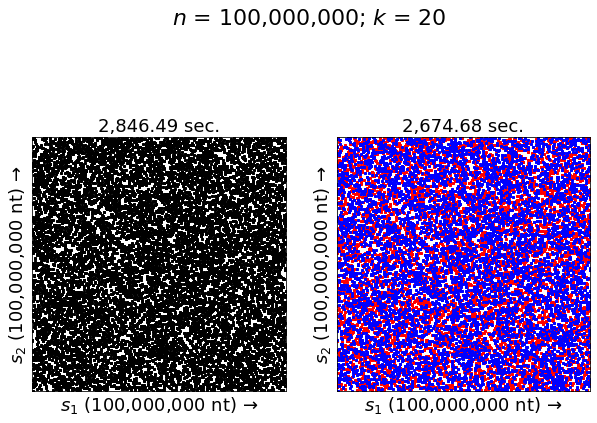

In [9]:
sim(100000000, 20, markersize=2, fig_size_inches=(10, 10))

So we can actually create a dot plot of two 100 Mbp sequences (using a large enough $k$) -- it just takes ~50 minutes, at least on my laptop. (The left plot took ~47.4 minutes, and the right plot took ~44.6 minutes. Sometimes you've just gotta... start something running, and then walk over to the gym, and then come back later in the night.)

I should probably note here that this result is surprising to me -- I reran this after adding in support to `viz_spy()` for drawing not-binary matrices in color, thinking that this would cause an increase in total runtime. It's weird that the right plot finished faster than the left plot, even though the actual visualization step took longer! Of course, this might be due to weird variations in other things my laptop was running in the background -- this isn't a very formal benchmarking result.